In [4]:
from numpy import cos, sin, sqrt

In [5]:
def calc_VpVg_fastandslow(cs, ca, theta):
    """Calculates the phase velocities and group velocities for fast and slow waves.
    """
    cos_angle = cos(theta)
    sin_angle = sin(theta)

    cm = sqrt(cs**2 + ca**2)

    cn4 = cm**4 - 4 * cs**2 * ca**2 * cos_angle**2
    cn2 = sqrt(cn4)

    tmp2 = cm**2 - cn2

    Cp_slow = sqrt(0.5 * (tmp2))
    Cp_fast = sqrt(0.5 * (cm**2 + cn2))

    Cg_slow_perp = (
        sin_angle * Cp_slow * (1 - cs**2 * ca**2 / Cp_slow**2 / cn2 * cos_angle**2)
    )
    Cg_slow_para = (
        cos_angle * Cp_slow * (1 + cs**2 * ca**2 / Cp_slow**2 / cn2 * sin_angle**2)
    )

    Cg_fast_perp = (
        sin_angle * Cp_fast * (1 + cs**2 * ca**2 / Cp_fast**2 / cn2 * cos_angle**2)
    )
    Cg_fast_para = (
        cos_angle * Cp_fast * (1 - cs**2 * ca**2 / Cp_fast**2 / cn2 * sin_angle**2)
    )

    return {
        "Vps": Cp_slow,
        "Vpf": Cp_fast,
        "Vgs_perp": Cg_slow_perp,
        "Vgs_para": Cg_slow_para,
        "Vgf_perp": Cg_fast_perp,
        "Vgf_para": Cg_fast_para,
    }

In [38]:
import numpy as np
from scipy.optimize import root_scalar

cs = 0.8
ca = 1.0
cm = np.sqrt(cs**2 + ca**2)

angle_kb = np.arange(1,360,1) * np.pi/180
   
result = calc_VpVg_fastandslow(cs,ca,angle_kb)
Cp_slow = result['Vps']
Cp_fast = result['Vpf']
Cg_slow_perp = result['Vgs_perp']
Cg_slow_para = result['Vgs_para']
Cg_fast_perp = result['Vgf_perp']
Cg_fast_para = result['Vgf_para']

/var/folders/tg/rfd0nr_970s3mv1fspgvkkxm0000gn/T/ipykernel_22523/3788757295.py:18: RuntimeWarning: divide by zero encountered in divide
  sin_angle * Cp_slow * (1 - cs**2 * ca**2 / Cp_slow**2 / cn2 * cos_angle**2)
/var/folders/tg/rfd0nr_970s3mv1fspgvkkxm0000gn/T/ipykernel_22523/3788757295.py:18: RuntimeWarning: invalid value encountered in multiply
  sin_angle * Cp_slow * (1 - cs**2 * ca**2 / Cp_slow**2 / cn2 * cos_angle**2)
/var/folders/tg/rfd0nr_970s3mv1fspgvkkxm0000gn/T/ipykernel_22523/3788757295.py:21: RuntimeWarning: divide by zero encountered in divide
  cos_angle * Cp_slow * (1 + cs**2 * ca**2 / Cp_slow**2 / cn2 * sin_angle**2)
/var/folders/tg/rfd0nr_970s3mv1fspgvkkxm0000gn/T/ipykernel_22523/3788757295.py:21: RuntimeWarning: invalid value encountered in multiply
  cos_angle * Cp_slow * (1 + cs**2 * ca**2 / Cp_slow**2 / cn2 * sin_angle**2)


Text(0, 0.5, '$V_{\\perp}$')

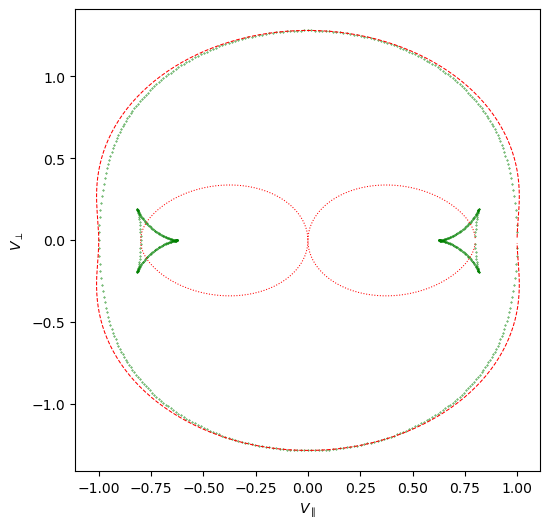

In [39]:
from matplotlib import pyplot as plt
# add a figure of equal x and y aspect ratio
fig, ax = plt.subplots(figsize=(6,6))

# plot phase speed of fast/slow 
ax.plot(Cp_fast * np.cos(angle_kb), Cp_fast * np.sin(angle_kb), 
    ls='--',color='red',lw=0.75,label=r'$V_{p,f}$')
ax.plot(Cp_slow * np.cos(angle_kb), Cp_slow * np.sin(angle_kb), 
    ls=':',color='red',lw=0.75,label=r'$V_{p,s}$')

# plot group velocity of fast/slow wind
ax.scatter(Cg_slow_para, Cg_slow_perp, marker='.', s=0.5,color='green',label=r'$V_{g,s}$')
ax.scatter(Cg_fast_para, Cg_fast_perp, marker='.', s=0.5,color='green',label=r'$V_{g,f}$')

ax.set_xlabel(r'$V_{\parallel}$')
ax.set_ylabel(r'$V_{\perp}$')

In [40]:
import os
os.makedirs('./group_velocity_angle', exist_ok=True)

In [41]:
def func_for_maximum_Vgsperp_costheta(h,cs = 0.5, ca = 1.0):
    cs2 = cs*cs
    ca2 = ca*ca 
    cm2 = cs2 + ca2 
    cm4 = cm2 * cm2 
    cn4 = cm4 - 4*cs2*ca2*h
    if cn4<0:
        cn4 = 0
    
    cn2 = sqrt(cn4)
    vp2 = 0.5 * (cm2 - cn2)

    r = cs2 * ca2 / vp2 / cn2 

    return r * (1-h) * (1-r*h) - (1-r*h) - 2 * (1-h)\
        *(r - h * r*r * ( 2 -  cm2 / cn2))

In [47]:
theta_max_Vgsperp

0.2619881172665487

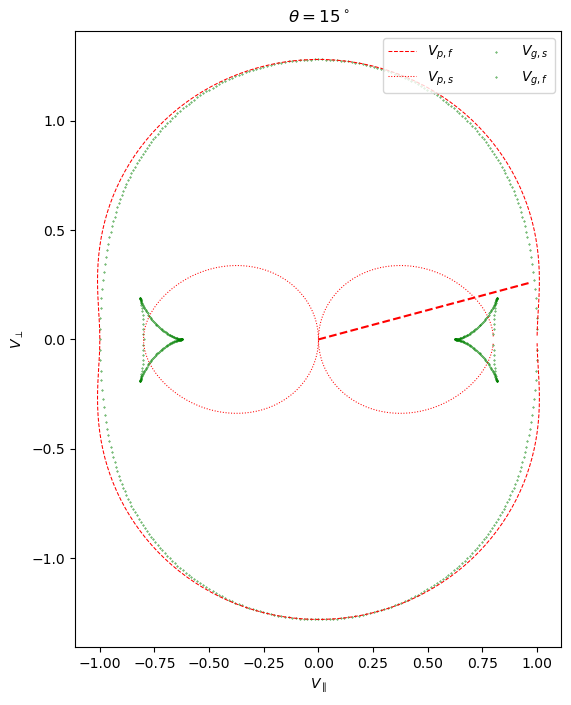

In [48]:
# find the kB angle corresponding to maximum Vgsperp
sol = root_scalar(func_for_maximum_Vgsperp_costheta, args=(cs,ca), bracket = [1e-3,1-1e-3], method='brentq')

if sol.converged:
    h = sol.root  # h = cos^2 theta
    theta_max_Vgsperp = np.arccos(np.sqrt(h))

fig = plt.figure(figsize=[8,8])
sub = fig.add_subplot(111,aspect='equal')

# plot phase speed of fast/slow 
sub.plot(Cp_fast * np.cos(angle_kb), Cp_fast * np.sin(angle_kb), 
    ls='--',color='red',lw=0.75,label=r'$V_{p,f}$')
sub.plot(Cp_slow * np.cos(angle_kb), Cp_slow * np.sin(angle_kb), 
    ls=':',color='red',lw=0.75,label=r'$V_{p,s}$')

# plot group velocity of fast/slow wind
sub.scatter(Cg_slow_para, Cg_slow_perp, marker='.', s=0.5,color='green',label=r'$V_{g,s}$')
sub.scatter(Cg_fast_para, Cg_fast_perp, marker='.', s=0.5,color='green',label=r'$V_{g,f}$')

# draw a straight line connected to the instantaneous Cg
# sub.plot([0,Cg_fast_para[i]],[0,Cg_fast_perp[i]],color='C1',ls=':')
# sub.plot([0,Cg_slow_para[i]],[0,Cg_slow_perp[i]],color='C1',ls='--')

# direction of k corresponding to the maximum value of Vgsperp
sub.plot([0, np.cos(theta_max_Vgsperp)], [0, np.sin(theta_max_Vgsperp)], 
    color='red', ls='--')

sub.legend(ncol=2)

sub.set_title(r'$θ = {}^\circ$'.format(int(theta_max_Vgsperp * 180 / np.pi)))
sub.set_xlabel(r'$V_{\parallel}$')
sub.set_ylabel(r'$V_{\perp}$')

fig;

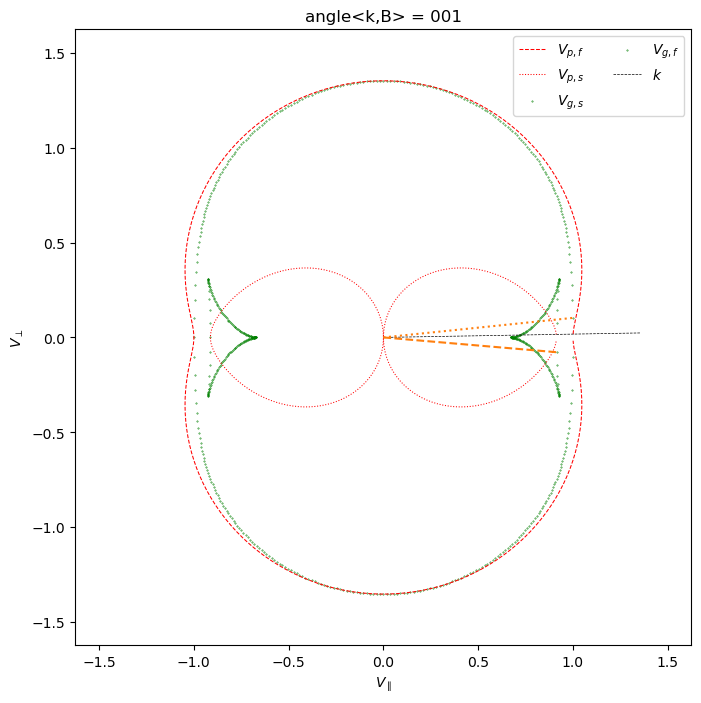

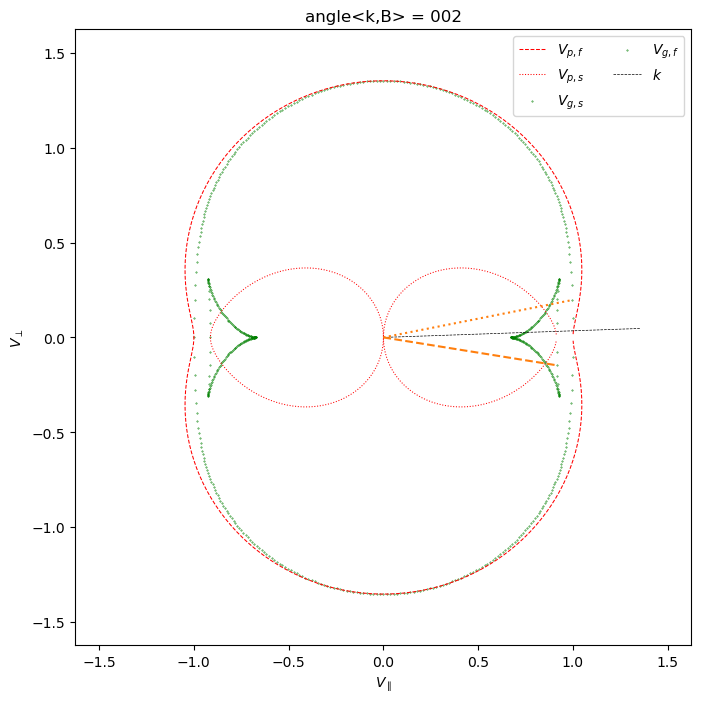

In [14]:
# find the kB angle corresponding to maximum Vgsperp
sol = root_scalar(func_for_maximum_Vgsperp_costheta, args=(cs,ca), bracket = [1e-3,1-1e-3], method='brentq')
if sol.converged:
    h = sol.root  # h = cos^2 theta
    theta_max_Vgsperp = np.arccos(np.sqrt(h))

for i in range(len((angle_kb[0:2]))):
    theta = angle_kb[i]

    fig = plt.figure(figsize=[8,8])
    sub = fig.add_subplot(111,aspect='equal')

    # plot phase speed of fast/slow 
    sub.plot(Cp_fast * np.cos(angle_kb), Cp_fast * np.sin(angle_kb), 
        ls='--',color='red',lw=0.75,label=r'$V_{p,f}$')
    sub.plot(Cp_slow * np.cos(angle_kb), Cp_slow * np.sin(angle_kb), 
        ls=':',color='red',lw=0.75,label=r'$V_{p,s}$')

    # plot group velocity of fast/slow wind
    sub.scatter(Cg_slow_para, Cg_slow_perp, marker='.', s=0.5,color='green',label=r'$V_{g,s}$')
    sub.scatter(Cg_fast_para, Cg_fast_perp, marker='.', s=0.5,color='green',label=r'$V_{g,f}$')

    sub.plot([0, k_radius * np.cos(theta)], [0, k_radius * np.sin(theta)], 
        ls='--', lw=0.5, color = 'k', label=r'$k$')


    # draw a straight line connected to the instantaneous Cg
    sub.plot([0,Cg_fast_para[i]],[0,Cg_fast_perp[i]],color='C1',ls=':')
    sub.plot([0,Cg_slow_para[i]],[0,Cg_slow_perp[i]],color='C1',ls='--')

    # # direction of k corresponding to the maximum value of Vgsperp
    # sub.plot([0,k_radius * np.cos(theta_max_Vgsperp)], [0, k_radius * np.sin(theta_max_Vgsperp)], 
    #     color='red', ls='--')

    sub.legend(ncol=2)

    sub.set_title(r'angle<k,B> = {:03d}'.format(int(angle_kb[i] * 180 / np.pi)))
    sub.set_xlabel(r'$V_{\parallel}$')
    sub.set_ylabel(r'$V_{\perp}$')


    sub.set_xlim([-1.2*cm,1.2*cm])
    sub.set_ylim([-1.2*cm,1.2*cm])

    # fig.savefig('./group_velocity_angle/anglekb_{:03d}.png'.
    #     format(int(angle_kb[i] * 180 / np.pi)),dpi=300)
    # plt.close(fig)